# Web Scrapping with NBA Stats

We will employ the NBA basketball referance site for our web scrapping. We consider the season 2018-2019 as our point of interest. The reason of not choosing the most current season 2019-2020 was due to the COVID-19 outbreak. As a reasult, there was not enough data for our analysis.

Our project is also in tribute to the fallen star, Kobe Bryant- you will see a bit of him in the few images shared below. 

<img src="https://wallpaperplay.com/walls/full/4/0/3/91229.jpg"/>

We will start by importing the needed libraries as below.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

## Soup Object

Next, we create our soup object from the link with help of the BeautifulSoup function from the bs4 library.

In [2]:
# NBA season we will be analyzing
html = requests.get('https://www.basketball-reference.com/leagues/NBA_2019_totals.html')
soup = BeautifulSoup(html.content)

## Column Headers 

We then extract all the header names from the table which we will use as our column names in our final data frame.

In [3]:
# use findALL() to get the column headers
soup.find('tr')
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.find('tr').findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
print(headers)

['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


## Rows

We now extract all the rows from the table- on the NBA website- and save those to our dataframe.

In [4]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [5]:
#now create the dataframe from the headers and rows in the player_stats above
df = pd.DataFrame(player_stats, columns = headers)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,588,56,157,.357,...,.923,5,43,48,20,17,6,14,53,165
1,Quincy Acy,PF,28,PHO,10,0,123,4,18,.222,...,.700,3,22,25,8,1,4,4,24,17
2,Jaylen Adams,PG,22,ATL,34,1,428,38,110,.345,...,.778,11,49,60,65,14,5,28,45,108
3,Steven Adams,C,25,OKC,80,80,2669,481,809,.595,...,.500,391,369,760,124,117,76,135,204,1108
4,Bam Adebayo,C,21,MIA,82,28,1913,280,486,.576,...,.735,165,432,597,184,71,65,121,203,729


In [7]:
# save the dataset as csv file and read the csv file again
df.to_csv('NBA.csv')
df = pd.read_csv('NBA.csv', encoding = 'utf-8')
# remove the Unnamed colume
df = df.drop(columns=['Unnamed: 0'])
df.shape

(734, 29)

## Column Descriptions

Describing the column hearders: Next we dive deep into descriping our columns headers. 

In [8]:
total = soup.find('tr').findAll('th')
des = [total[i]['aria-label'] for i in range(len(total))]
#remove the first row from header description
header_des = des[1:]
#convert the headers and header_des lists into a dictionary
headers_dic = dict(zip(headers, header_des))
#convert the above dictionary into a DataFrame
headers_descriptions = pd.DataFrame.from_dict(headers_dic,orient='index')
headers_descriptions.columns = ["Short Description"]
headers_descriptions

,Short Description
Player,Player
Pos,Position
Age,Player's age on February 1 of the season
Tm,Team
G,Games
GS,Games Started
MP,Minutes Played
FG,Field Goals
FGA,Field Goal Attempts
FG%,Field Goal Percentage


## Team Names

Now we will extract the team full names from the website.

In [9]:
html2 = requests.get('https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Basketball_Association/National_Basketball_Association_team_abbreviations')
soup2 = BeautifulSoup(html2.content)

In [10]:
# use findALL() to get the column headers
soup2.find('tr')
# use getText()to extract the text we need into a list
headers2 = [b.getText() for b in soup2.find('tr').findAll('b')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
#headers2 = headers2[1:]
print(headers2)

['Abbreviation/Acronym', 'Franchise']


In [11]:
# avoid the first header row
rows2 = soup2.findAll('tr')[1:]
team_stats = [[td.getText() for td in rows2[i].findAll('td')]
            for i in range(len(rows2))]

In [12]:
df_team = pd.DataFrame(team_stats,columns = headers2)
for column in df_team.columns:
    df_team[column] = df_team[column].str.replace('\n','')

In [13]:
df_team.set_index('Abbreviation/Acronym',inplace = True)
df_team

,Franchise
Abbreviation/Acronym,
ATL,Atlanta Hawks
BKN,Brooklyn Nets
BOS,Boston Celtics
CHA,Charlotte Hornets
CHI,Chicago Bulls
CLE,Cleveland Cavaliers
DAL,Dallas Mavericks
DEN,Denver Nuggets
DET,Detroit Pistons


In [14]:
# Cheaking the missing values
df.isnull().sum()

Player    26
Pos       26
Age       26
Tm        26
G         26
GS        26
MP        26
FG        26
FGA       26
FG%       32
3P        26
3PA       26
3P%       73
2P        26
2PA       26
2P%       41
eFG%      32
FT        26
FTA       26
FT%       69
ORB       26
DRB       26
TRB       26
AST       26
STL       26
BLK       26
TOV       26
PF        26
PTS       26
dtype: int64

In [15]:
# Drop the missing values
df.dropna(inplace= True)
df.shape

(629, 29)

# Exploratory Data Analysis: EDA

Let the exploratory data analysis begin!

## Age Distribution

In [16]:
# Age distribution
df.Age.iplot(kind='hist',color='olive')

As can be seen above the age distribution is skewed to the right. This means that it has a heavy left tail- showing that the NBA favours young players. After 35 years of age, there's slim to no chance of succeeding in the NBA (and as they say: slim just died). 

## Average Age 

In [17]:
# Average age of team players
df_team = df.groupby('Tm')['Age'].agg('mean').sort_values().iplot(kind = 'bar',color = 'lightslategray')

The graph above conveys to us a message that the average age of an NBA team is about the age of 26. Hence reinforcing our observation bove.

In [18]:
# Average player age as per different positions: NBA season 2018-2019
df.groupby('Pos')['Age'].agg('mean').sort_values().iplot(kind = 'bar',color = 'indigo')

What can we learn from the bar plot above?

The center position hosts the most aged players compared to all other position- ignoring the fact that a few players hold multiple positions: such as PF-SF.

Also, when we look at the layout of the basketball court, the graph above reveals that the players that play on the right side of the court seem to be the youngest(on average), while players that play on the left side of the court seem to be the oldest players on the court.

Next, let's compare performance of teams.

## Teams' Performance Comparison

In [19]:
df_NY_knicks = df[df['Tm'] =='NYK'] 
df_Toronto_Raptors = df[df['Tm'] == 'TOR']


df_avg_NY_knicks = df_NY_knicks[['FG%','3P%','2P%','eFG%','FT%']].mean()
df_avg_Tor = df_Toronto_Raptors[['FG%','3P%','2P%','eFG%','FT%']].mean()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
  r = df_avg_Tor,
  theta=['Field Goals Percentage','3-Points Goal Percentage','2-Points Goal Percentage', 'Effective Field Goal Percentage',
           'Free Throw Percentage'],
  fill='toself',
  name = 'Toronto Raptors'
))

fig.add_trace(go.Scatterpolar(
  r = df_avg_NY_knicks,
  theta=['Field Goals Percentage','3-Points Goal Percentage','2-Points Goal Percentage', 'Effective Field Goal Percentage',
           'Free Throw Percentage'],
  fill='toself',
  name = 'NY Knicks'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True,
title = 'NY Knicks VS Toronto Raptors:Attacking'
)

fig.show()
#NY Knicks VS Toronto Raptors: Attacking radar plots

For this one we decided to use NY Knicks, a not-so-good team, and the Toronto Raptors, the champions of the season. Furthermore,, we will employ radar charts to investigate the performance of both teams accross different parameters.

The Toronto Raptors clearly performed better than the NY Knicks in the attacking aspect of the game- based off of the attacking parameters we chose.

In [20]:
def normalize(val):
    return (val-val.min())/((val.max()-val.min()))

df_avg_NY_knicks_def = df_NY_knicks[['DRB','STL','BLK','TOV']].apply(normalize).mean()
df_avg_Tor_def = df_Toronto_Raptors[['DRB','STL','BLK','TOV']].apply(normalize).mean()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
  r = df_avg_NY_knicks_def,
  theta=['Deffensive Rebounds','Steals','Blocks', 'Turnover'],
  fill='toself',
  name = 'NY Knicks'
))
fig.add_trace(go.Scatterpolar(
  r = df_avg_Tor_def,
  theta=['Deffensive Rebounds','Steals','Blocks', 'Turnover'],
  fill='toself',
  name = 'Toronto Raptors'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True,
title = 'NY Knicks VS Toronto Raptors::Defence '
)

fig.show()
# NY Knicks VS Toronto Raptors:Defence radar plots

When it came down to defence, the radar plots indicate that the NY Knicks did a tremendous job as compared the seasons's champions. One would deduce that attack is better than defence in the NBA.

Let's now try to analyze the scoring aspect of the game.

## The Top and Least Scorers

Below we compute the top and least scorers. We then display the top five for each category.

In [21]:
# Top scorers
top_scorers= df.sort_values(by = 'PTS',ascending=False).head(5)
top_scorers

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
277,James Harden,PG,29.0,HOU,78.0,78.0,2867.0,843.0,1909.0,0.442,...,0.879,66.0,452.0,518.0,586.0,158.0,58.0,387.0,244.0,2818.0
249,Paul George,SF,28.0,OKC,77.0,77.0,2841.0,707.0,1614.0,0.438,...,0.839,105.0,523.0,628.0,318.0,170.0,34.0,205.0,214.0,2159.0
689,Kemba Walker,PG,28.0,CHO,82.0,82.0,2863.0,731.0,1684.0,0.434,...,0.844,52.0,309.0,361.0,484.0,102.0,34.0,211.0,131.0,2102.0
48,Bradley Beal,SG,25.0,WAS,82.0,82.0,3028.0,764.0,1609.0,0.475,...,0.808,89.0,322.0,411.0,448.0,121.0,58.0,224.0,226.0,2099.0
416,Damian Lillard,PG,28.0,POR,80.0,80.0,2838.0,681.0,1533.0,0.444,...,0.912,68.0,303.0,371.0,551.0,88.0,34.0,212.0,148.0,2067.0


In [22]:
# Least scorers
least_scorers= df.sort_values(by = 'PTS',ascending=False).tail(5)
least_scorers

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6,DeVaughn Akoon-Purcell,SG,25.0,DEN,7.0,0.0,22.0,3.0,10.0,0.300,...,0.5,1.0,3.0,4.0,6.0,2.0,0.0,2.0,4.0,7.0
549,Justin Patton,C,21.0,PHI,3.0,0.0,21.0,2.0,7.0,0.286,...,0.5,2.0,4.0,6.0,3.0,2.0,0.0,0.0,5.0,5.0
457,Tahjere McCall,SG,24.0,BRK,1.0,0.0,8.0,2.0,3.0,0.667,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0
247,Pau Gasol,C,38.0,MIL,3.0,0.0,30.0,1.0,6.0,0.167,...,0.5,0.0,10.0,10.0,2.0,0.0,1.0,2.0,1.0,4.0
371,Terrence Jones,PF,27.0,HOU,2.0,0.0,5.0,1.0,4.0,0.250,...,0.0,0.0,4.0,4.0,0.0,0.0,0.0,1.0,1.0,2.0


## Comparison of Players' Performance

In this section, we compare player's performace both in defensive and attacking attributes. We will use Giannis Antetokounmpo, the most valuable player(MVP), and Vince Carter- the oldest player in the NBA for the season.

In [23]:
vince = df[df['Age'] == 42]
giannis = df[df['Player'] == 'Giannis Antetokounmpo']
df_avg_giannis = giannis[['FG%','3P%','2P%','eFG%','FT%']]
df_avg_vince = vince[['FG%','3P%','2P%','eFG%','FT%']]
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
  r = df_avg_giannis.iloc[0,:],
  theta=['Field Goals Percentage','3-Points Goal Percentage','2-Points Goal Percentage', 'Effective Field Goal Percentage',
           'Free Throw Percentage'],
  fill='toself',
  name = 'Giannis'
))
fig.add_trace(go.Scatterpolar(
  r = df_avg_vince.iloc[0,:],
  theta=['Field Goals Percentage','3-Points Goal Percentage','2-Points Goal Percentage', 'Effective Field Goal Percentage',
           'Free Throw Percentage'],
  fill='toself',
  name = 'Vince'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True,
title = 'MVP VS MOP'
)
fig.show()
# Giannis Antetokounmpo VS Vince Carter

Unsurprisingly, the MVP performed better than Vince  (the oldest player) accross all attacking attribute except for the 3P goals. This may suggest that 3P goals may require a great deal of experience.

## Swarmplot for Points Earned Across Ages

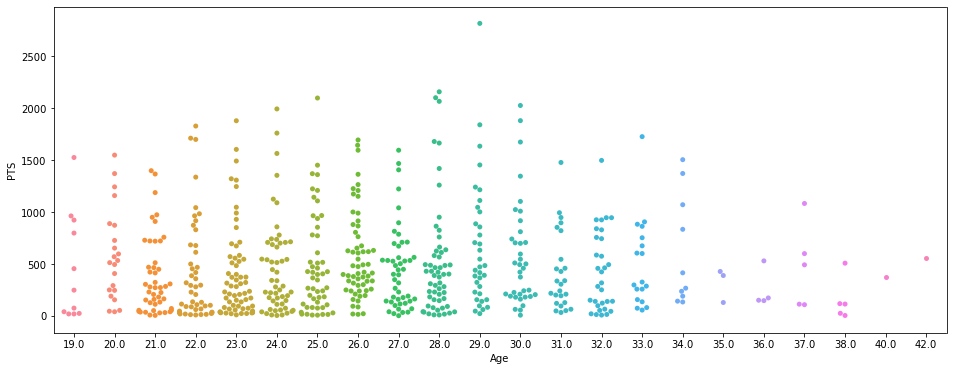

In [24]:
#swarmplot for points earned across ages in a season
plt.figure(figsize=(16, 6))
ax = sns.swarmplot(x="Age", y="PTS", data=df)

From the swarm plot above, we can see that the performance of exceptional players- as regards the points scored- rises until their late 20's and then starts to plummet.

## Analyzing the Performance with Age using Certain Stats

In [25]:
df_avg_age=df.groupby(by='Age')[['TOV','PTS','3P']].mean()
df_avg_age.iplot(kind='line',secondary_y='PTS')
# fig = px.scatter(x=df.Age, y=df.TOV)
# fig.show()

Again it is visible that the players' performace is relatively stable before the age of 30 and then becomes increasingly unstable there after. Generally speaking, the most unstable attribute in players' performance seems to be the points earned.

## Analysis the Performance with the Age and Position

We now check if the players become less offensive or defensive as they grow old. 

In [26]:
# Taking only those players whose positon was fixed. 
df_drop_multipos=df[df['Pos'].isin(['SG','PF','PG','C','SF'])]
# scatter ploting for the remaining data
fig = px.scatter(df_drop_multipos, x="Age", y="ORB", color="Pos", size='FG',hover_data=['DRB'])
fig.show()

The center(C) players are more offensive than all the other positions. And the small forwards (SF) are the least offensive. And generally players become less offensive as they grow older than 30 years of age.

In [27]:
#Considering personal foul of players according to the age 
fig = px.scatter(df_drop_multipos, x="Age", y="PF", color="Pos", size='STL',hover_data=['BLK','AST'])
fig.show()

## Calculate the Player Efficiency Rating (PER)

Player Efficiency Rating (available since the 1951-52 season): PER is a rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance."

We shall use this PER to rate players- in this project.

In [28]:
# Create the function to calculate the PER
def per(data):
    return (data['PTS']+data['TRB']+data['AST']+data['STL']+data['BLK']-data['FGA']+data['FG']\
           -data['FTA']+data['FT']-data['TOV'])/data['G']
# Apply the PER for the whole dataframe
df['PER']=df.apply(per,axis=1)


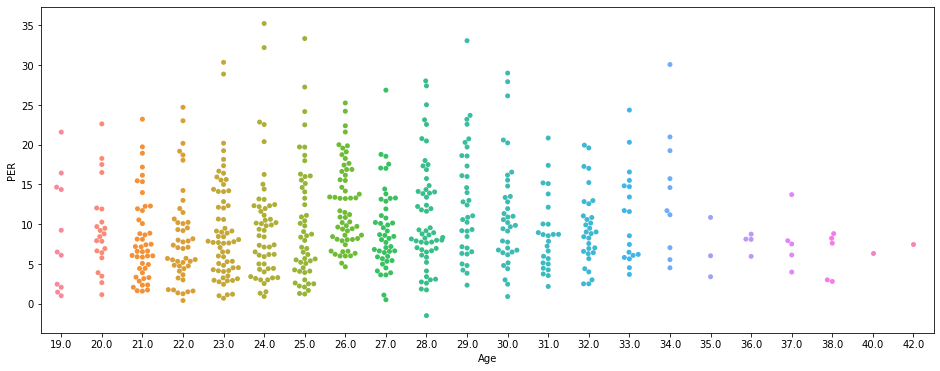

In [29]:
# Swarmplot to show the PER changes with the age
plt.figure(figsize=(16, 6))
ax = sns.swarmplot(x="Age", y="PER", data=df)

The PER grows until the age of about 30 and then starts to decline- a pattern we have seen all through our project.

## Top Players of Season 2018-2019

In [30]:
# sorting the players according to PER and select the top 10 among them
top_ten_players = df.sort_values(by='PER',ascending=False).head(10)
top_ten_players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
19,Giannis Antetokounmpo,PF,24.0,MIL,72.0,72.0,2358.0,721.0,1247.0,0.578,...,159.0,739.0,898.0,424.0,92.0,110.0,268.0,232.0,1994.0,35.250000
167,Anthony Davis,C,25.0,NOP,56.0,56.0,1850.0,530.0,1026.0,0.517,...,174.0,498.0,672.0,218.0,88.0,135.0,112.0,132.0,1452.0,33.357143
277,James Harden,PG,29.0,HOU,78.0,78.0,2867.0,843.0,1909.0,0.442,...,66.0,452.0,518.0,586.0,158.0,58.0,387.0,244.0,2818.0,33.089744
207,Joel Embiid,C,24.0,PHI,64.0,64.0,2154.0,580.0,1199.0,0.484,...,160.0,711.0,871.0,234.0,46.0,122.0,226.0,211.0,1761.0,32.218750
670,Karl-Anthony Towns,C,23.0,MIN,77.0,77.0,2545.0,681.0,1314.0,0.518,...,263.0,691.0,954.0,259.0,67.0,125.0,240.0,292.0,1880.0,30.363636


The results are not surprising at all as we can see familiar names in the top five. To make it sound even more convincing- it suffices to mention that the player name in the first row of our data frame happens to be the MVP for the season.

In [31]:
# visualize the top players 
fig = px.scatter(top_ten_players, x="PTS", y="PER", text="Player", size='Age')

fig.update_traces(textposition='top center')

fig.update_layout(
    height=550,
    title_text='Top ten players according to PER compared'
)

fig.show()

The plot above above indicates that for a player to be an MVP, so many aspects of the game have to be considered. Just a case in point: James Harden earned significantly more points that season than any other player but did not end up as the MVP.

## Ranking Teams According to  PER

I am not sure if this is the right approach but we are going to try and rank teams using PER- which rating is used to only rank players' performance. It's worth a shot.

In [32]:
# Average PER of each team
df.groupby('Tm').PER.mean().sort_values().iplot(kind='bar')

The result above doesn't paint the real picture of what was the out come that season. Since the champion- the Toronto Raptor's (TOT) are not at the top. This may be attributed to that fact that there are play offs in the NBA as well as conferences.

This may also mean that TOT may not have the best players but their player are well harmonized- or rather play as a team- as compared to the rest of the teams.

In [33]:
# Teams with the top players
fig = px.scatter(top_ten_players, x="Age", y="PER", color="Tm", size='PTS',text = 'Player',\
                 hover_data=['Player','3P','2P','AST','Pos'])
fig.show()

## PER Distribution

In [34]:
df[['PER']].iplot(kind='hist',histnorm='percent')

Most players have a PER of less than 15. And having a PER of over 25 puts among the greatest of all time (GOAT- as they say)

## Analysis of 3 Points 

In [35]:
fig = px.scatter(df, x="Age", y="3P", color="Pos",size='G',\
                 hover_data=['Player','3P','2P','AST','Pos'])
fig.show()

## Comparing Distribution of 2 and 3 Points 

In [36]:
df[['2P%','3P%']].iplot(kind='hist',histnorm='percent')

As expected both distributions are Normal/ Gaussian. Also, people score more 2P's than 3P's

In [37]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER'],
      dtype='object')

## Cross Correlations

Now we compute the correlations between the various attributes presented in  our table. This is to identify which ones are most correlated to each other.

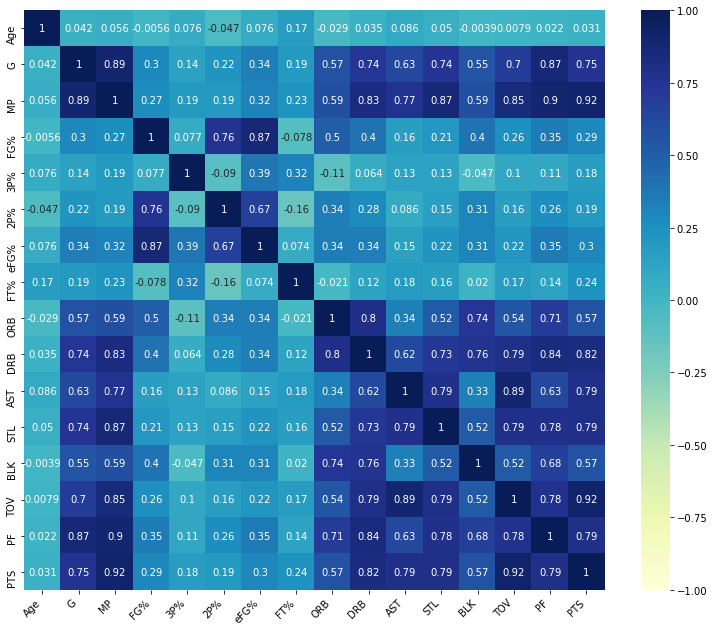

In [38]:
# df_corr = df.iloc[:,4:]
plt.figure(figsize=(13, 13))
corr = df[[ 'Age','G','MP','FG%','3P%','2P%','eFG%','FT%', 'ORB','DRB',\
           'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(60, 160, n=200),
    square=True,annot=True,cmap="YlGnBu",cbar_kws={"shrink": .82}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

It's surprising to note from the the correlation matrix above that the Age doesn't seem to be correlated with all the other variables. 

It seems to suggest as though Age doesn't affect player's performance in the NBA which is a false premise to make. One logical explanation for this discrepancy would be that the vast majority of NBA players are under the age of 30 hence making age difference not such a big factor- when it comes to player performace.

## Visualizing the Correlations

We now try to visualize those variables whose attributes exhibited the strongest correlations. The scatter diagram below indeed confirms that's the case.

In [39]:
fig = px.scatter_matrix(df,
    dimensions=["TOV", "AST", "PF", "ORB","DRB"],
    color="Pos")
fig.show()

<style>
td {
  font-size: 400px
}
</style>
Thank You             |  For Listening
:-------------------------:|:-------------------------:
<img src="https://media.giphy.com/media/JQvUME2YOpTgqCKhDb/giphy.gif"/>   |  <img src="https://media.giphy.com/media/TUbFmLt6xGhZS/giphy.gif"/> 